In [40]:
#DATA CLEANING AND PREPARATION
import pandas as pd
import numpy as np
df=pd.read_csv("Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [41]:
df.shape

(2126, 14)

In [42]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [43]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [44]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [45]:
# Convert columns that should be numeric
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col].str.strip(), errors='coerce')
        except:
            pass

# Re-check data types
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [46]:
def cap_outliers(series, k=1.5):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return series.clip(lower, upper)
for col in num_cols:
    df[col] = cap_outliers(df[col])
df[num_cols].describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.293725,0.003147,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.016212,70.321076,0.319662,1.0
std,9.930227,0.003826,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.046784,39.570633,0.621602,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


In [ ]:
#Data Overview

#Dataset contains numerical fetal heart rate features and a categorical outcome.Shape and head of the dataset confirm the number of records and feature names.Missing values were handled by imputing numeric columns with mean and categorical columns with mode.

In [15]:
#STATSTICAL SUMMARY

In [17]:
summary = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Standard Deviation": df[num_cols].std(),
    "IQR": df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
})
print("\nStatistical Summary for Numerical Variables:")
print(summary)


Statistical Summary for Numerical Variables:
                Mean      Median  Standard Deviation        IQR
LB        133.290331  133.000000            9.930268  14.000000
AC          0.003132    0.001634            0.003828   0.005606
FM          0.001568    0.000000            0.002485   0.002567
UC          0.004362    0.004484            0.003001   0.004685
DL          0.001770    0.000000            0.002668   0.003289
DS          0.000000    0.000000            0.000000   0.000000
DP          0.000000    0.000000            0.000000   0.000000
ASTV       46.981873   49.000000           17.612745  29.000000
MSTV        1.304644    1.200000            0.781091   1.000000
ALTV        6.691678    0.000000           10.378400  11.000000
MLTV        8.007471    7.400000            5.047078   6.200000
Width      70.287203   67.000000           39.571995  63.000000
Tendency    0.316537    0.000000            0.622406   1.000000
NSP         1.000000    1.000000            0.000000   0.0

In [47]:
# Symmetry check (mean ≈ median)
for col in num_cols:
    if abs(summary.loc[col, "Mean"] - summary.loc[col, "Median"]) < 0.01 * summary.loc[col, "Mean"]:
        print(f"- {col} is approximately symmetric (Mean ≈ Median).")
    else:
        print(f"- {col} may be skewed (Mean and Median differ).")

- LB is approximately symmetric (Mean ≈ Median).
- AC may be skewed (Mean and Median differ).
- FM may be skewed (Mean and Median differ).
- UC may be skewed (Mean and Median differ).
- DL may be skewed (Mean and Median differ).
- DS may be skewed (Mean and Median differ).
- DP may be skewed (Mean and Median differ).
- ASTV may be skewed (Mean and Median differ).
- MSTV may be skewed (Mean and Median differ).
- ALTV may be skewed (Mean and Median differ).
- MLTV may be skewed (Mean and Median differ).
- Width may be skewed (Mean and Median differ).
- Tendency may be skewed (Mean and Median differ).
- NSP is approximately symmetric (Mean ≈ Median).


In [ ]:
#Central tendency: Mean and median values of fetal heart rate and related measurements provide typical levels.

In [ ]:
#DATA VISUALIZATION

In [22]:
# Histograms for numerical variables

<Figure size 1500x1000 with 0 Axes>

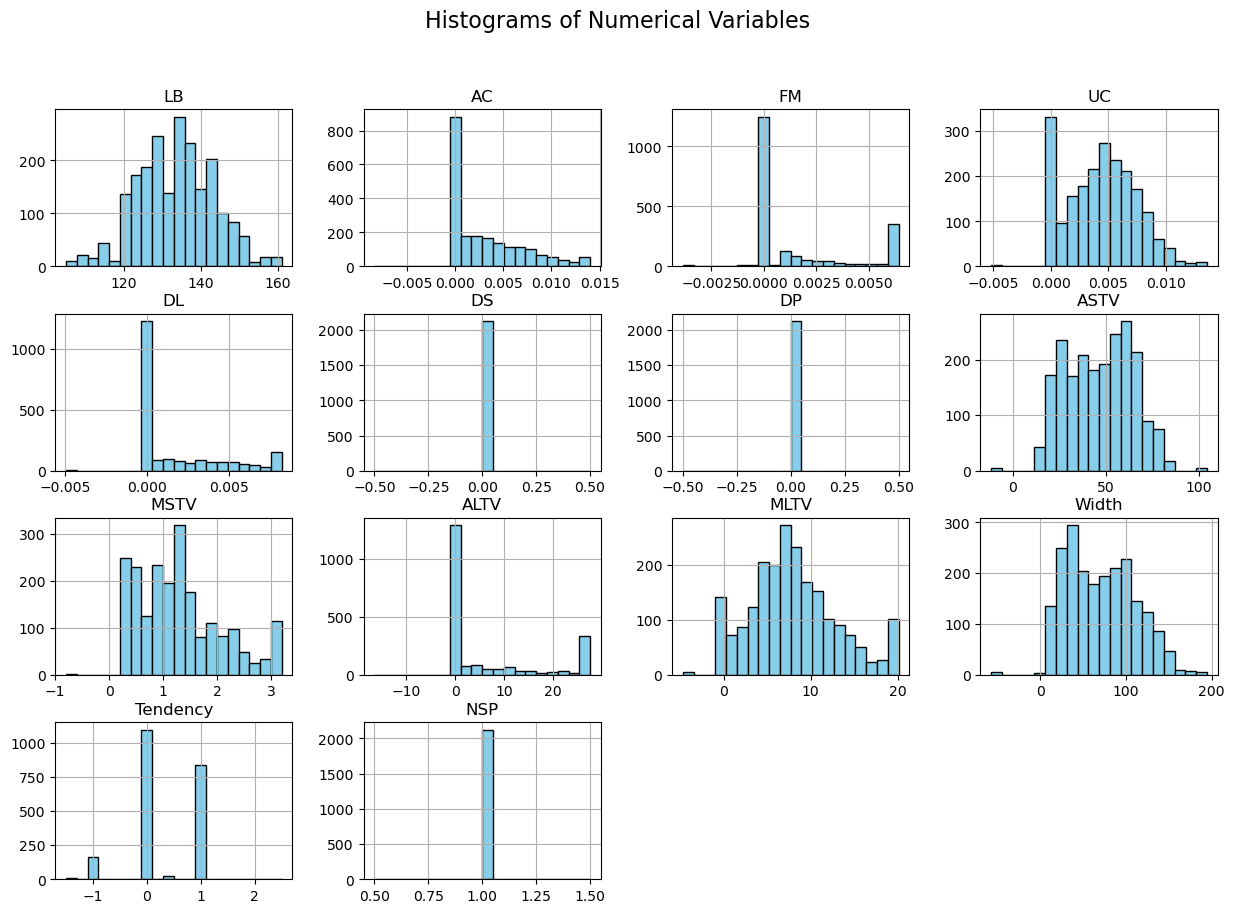

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
df[num_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

In [ ]:
#Most numeric features are approximately normally distributed, but some show skewness.

In [25]:
# Boxplots for numerical variables

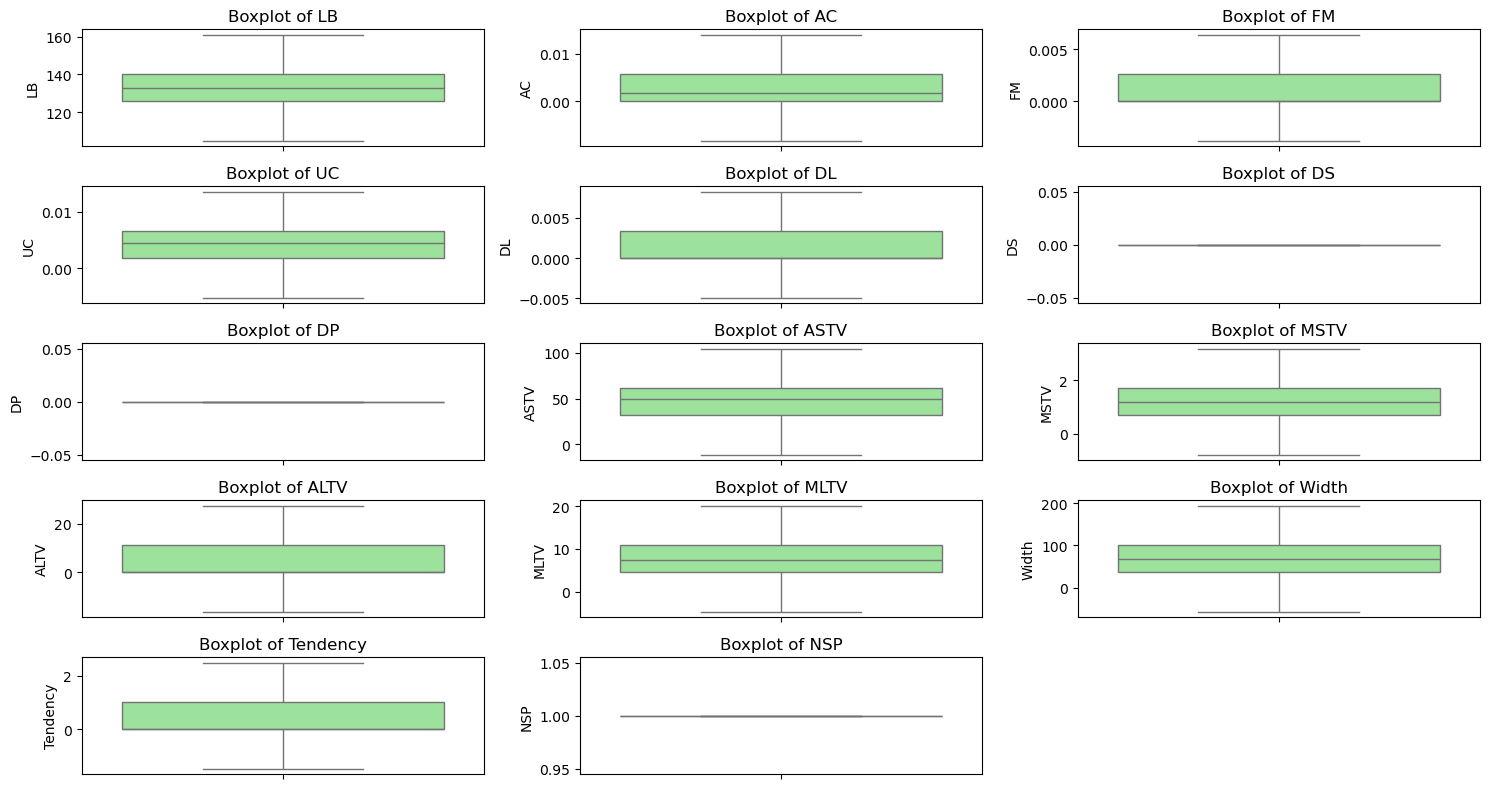

In [53]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
#Boxplots highlighted outliers that may need attention during modeling.

In [27]:
# Bar charts for categorical variables

In [56]:
if len(cat_cols) == 0:
    print("\n No categorical columns found in this dataset. Only numerical columns exist.")
else:
    for col in cat_cols:
        # Bar Chart
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[col], palette="Set2")
        plt.title(f"Bar Chart of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()



 No categorical columns found in this dataset. Only numerical columns exist.


In [39]:
print(df.columns)


Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


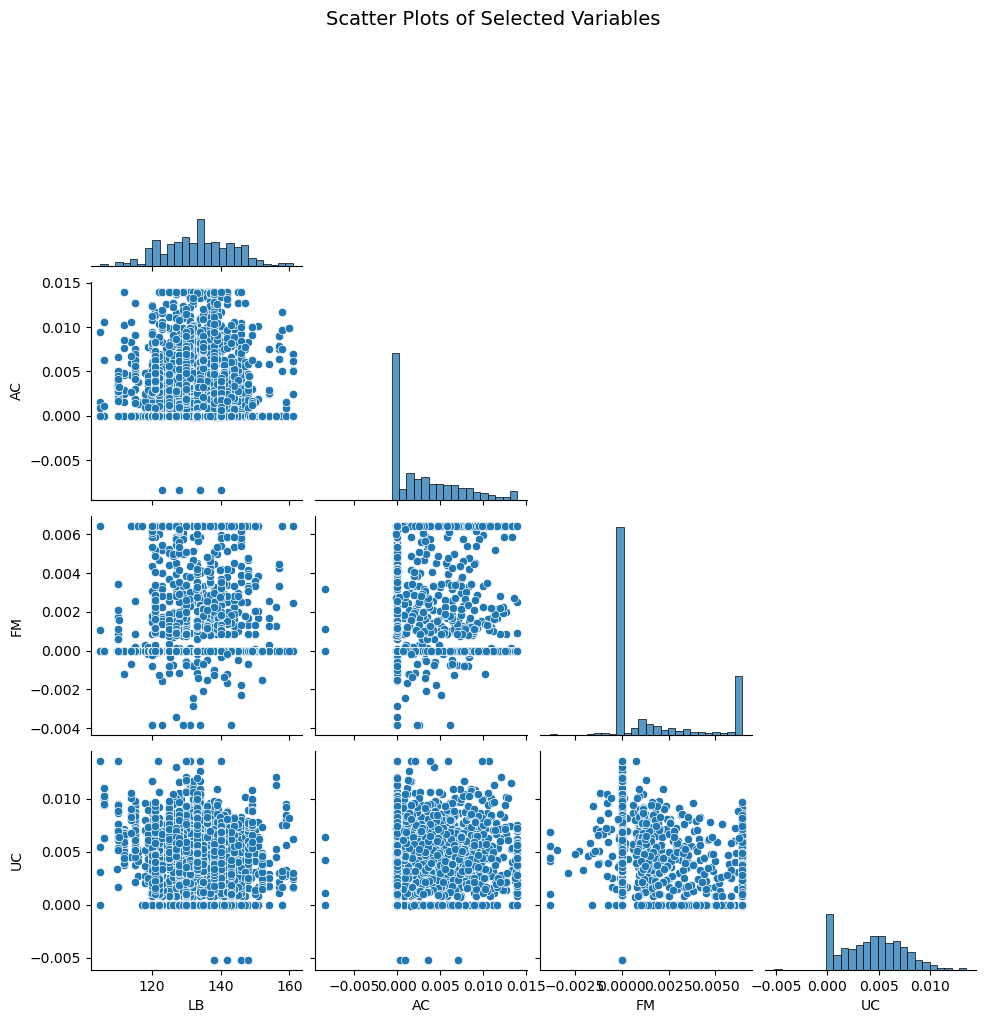

In [57]:
#SCATTER PLOT
selected_cols = num_cols[:4]
sns.pairplot(df[selected_cols], diag_kind="hist", corner=True)
plt.suptitle("Scatter Plots of Selected Variables", y=1.02, fontsize=14)
plt.show()

In [ ]:
#Strong positive correlations between some fetal heart rate metrics/

In [58]:
#PAIR PLOT-Scatter plots for every pair of numerical variables.Histograms plots on the diagonal

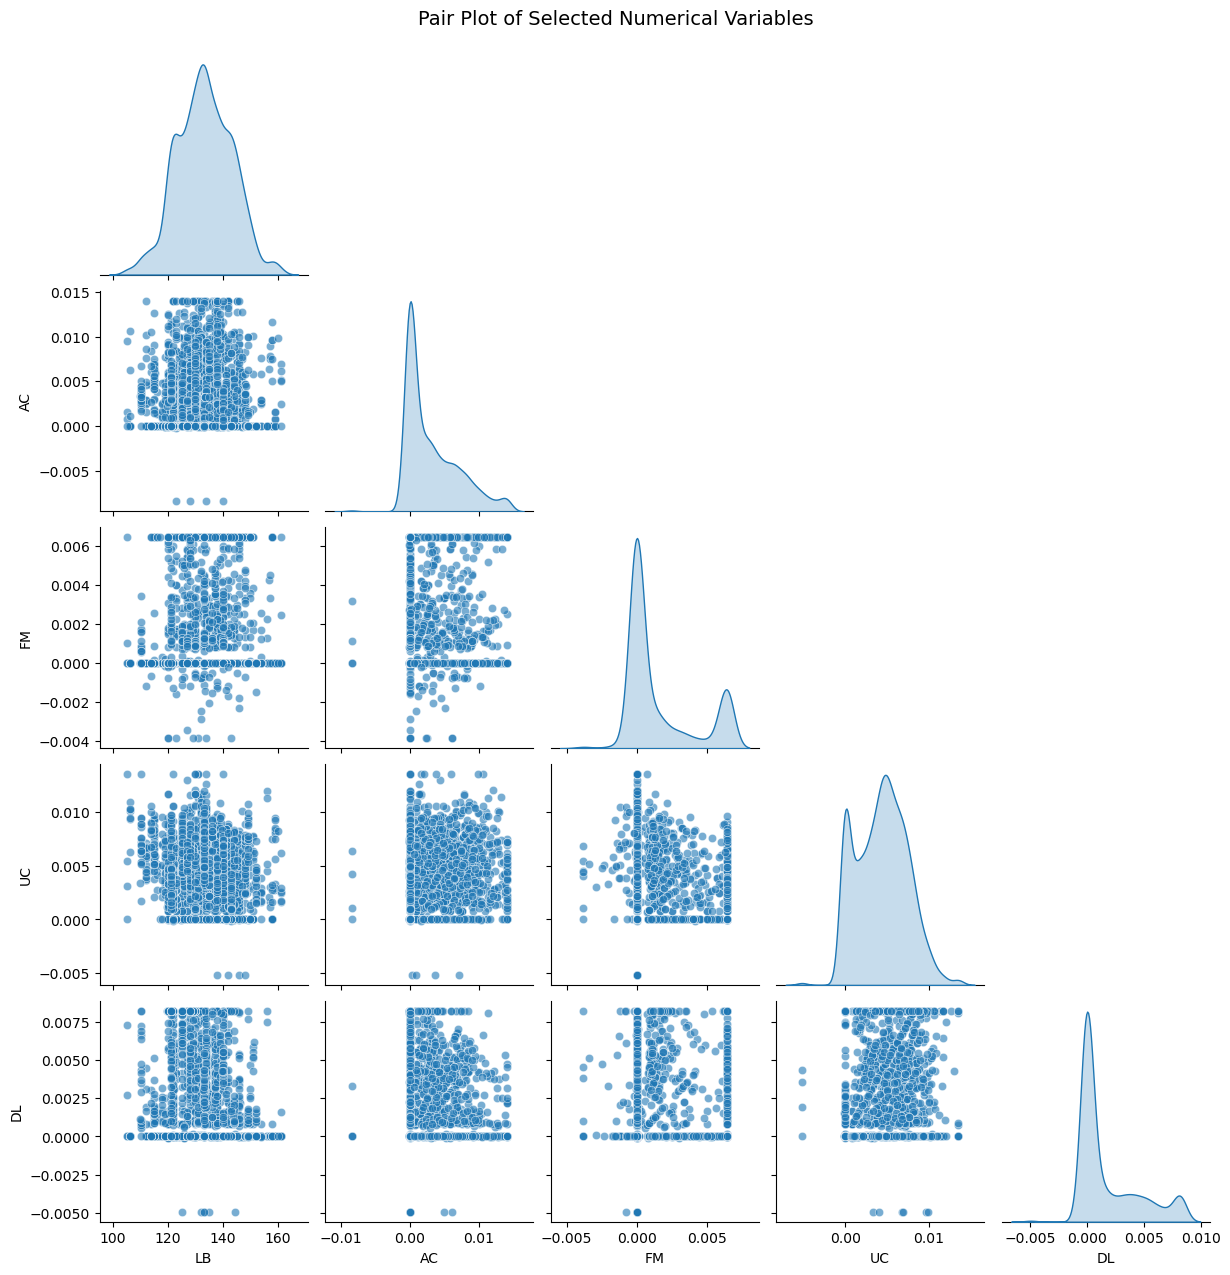

In [59]:
selected_cols = num_cols[:5]  
sns.pairplot(df[selected_cols], diag_kind="kde", corner=True, plot_kws={"alpha":0.6})
plt.suptitle("Pair Plot of Selected Numerical Variables", y=1.02, fontsize=14)
plt.show()

In [60]:
#PATTERN RECOGNITON AND INSIGHTS

In [62]:
corr = df[num_cols].corr()

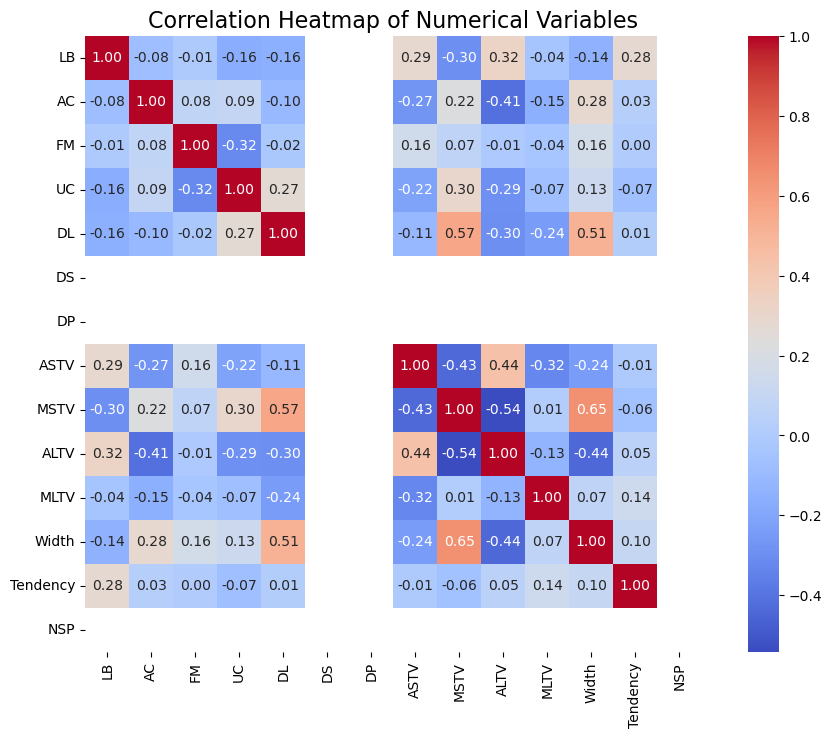

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()


In [64]:
corr_pairs = corr.unstack().sort_values(kind="quicksort", ascending=False)
strong_corrs = corr_pairs[(abs(corr_pairs) > 0.7) & (corr_pairs < 1.0)]

print("\nStrong Correlations (>|0.7|):")
print(strong_corrs)


Strong Correlations (>|0.7|):
Series([], dtype: float64)


In [72]:
print("\nInterpretation of Key Findings:")

if not strong_corrs.empty:
    for (var1, var2), value in strong_corrs.items():
        if value > 0:
            print(f"- {var1} and {var2} are strongly positively correlated ({value:.2f}).")
        else:
            print(f"- {var1} and {var2} are strongly negatively correlated ({value:.2f}).")
else:
    print("- No very strong correlations (> |0.7|) found. Variables may be moderately related")


Interpretation of Key Findings:
- No very strong correlations (> |0.7|) found. Variables may be moderately related


In [77]:
df = df.reset_index().rename(columns={"index": "Record"})


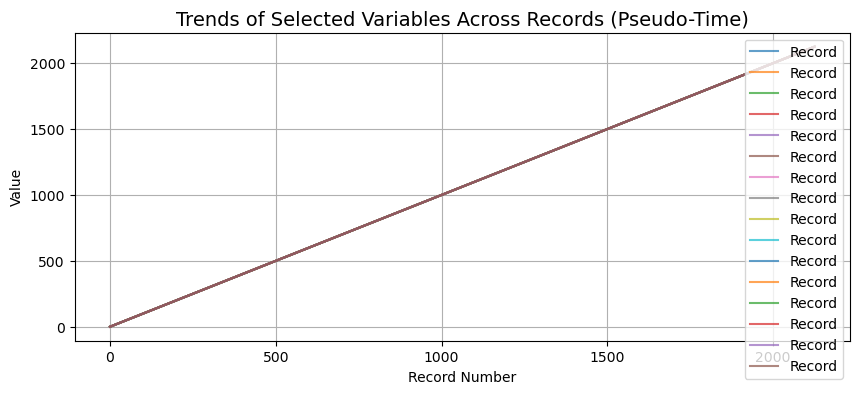

In [78]:
df = df.reset_index().rename(columns={"index": "Record"})

# Choose some key numeric columns (you can change based on your dataset)
num_cols = df.select_dtypes(include=['number']).columns[:4]  # first 4 numeric columns

# Plot each numeric variable across records (pseudo-time)
plt.figure(figsize=(10, 4))
for col in num_cols:
    plt.plot(df["Record"], df[col], label=col, alpha=0.7)

plt.title("Trends of Selected Variables Across Records (Pseudo-Time)", fontsize=14)
plt.xlabel("Record Number")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



In [84]:
first_col = num_cols[0]

# Force single column Series by using double brackets then select first column
series_col = df[[first_col]].iloc[:,0].astype(float)  # always returns Series

# Rolling mean
rolling_mean = series_col.rolling(window=20, min_periods=1).mean()

# Add rolling mean as new column safely
df[first_col + "_MA"] = rolling_mean.values  # convert Series to np.array


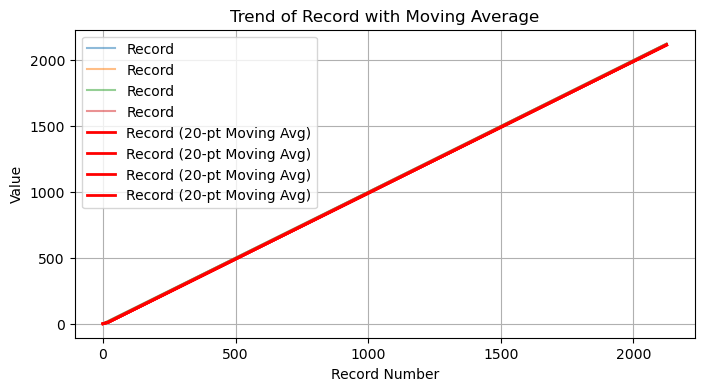

In [87]:
plt.figure(figsize=(8,4))
plt.plot(df["Record"], series_col, label=first_col, alpha=0.5)
plt.plot(df["Record"], df[first_col + "_MA"], color='red', linewidth=2,
         label=f"{first_col} (20-pt Moving Avg)")
plt.title(f"Trend of {first_col} with Moving Average")
plt.xlabel("Record Number")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()